# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [567]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import re

import seaborn
import pylab as pl
%pylab inline

PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [83]:
# http://cosmo.nyu.edu/~fb55/PUI2016/data/

In [157]:
# Load dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9',
                  nrows = 100000)   #  for specific columns: usecols=['Complaint Type',..]
data.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,40,43,44,45,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [158]:
# Check if all Boroughs and Community Districts are represented in the Data 
# 6 Boroughs
# 77 unique community board  (with error ones that need to deal with)

In [197]:
data2 = data.ix[:,('Unique Key','Created Date','Incident Zip','City', 'Borough','Community Board','Complaint Type',
                  'X Coordinate (State Plane)', 'Y Coordinate (State Plane)')]

In [198]:
data2['Community Board'].count()

100000

In [199]:
# How many unique values do we have? 
data2['Community Board'].unique()

array(['13 BROOKLYN', '0 Unspecified', '18 BROOKLYN', '12 BROOKLYN',
       '02 STATEN ISLAND', '08 MANHATTAN', '06 BROOKLYN', '10 BRONX',
       '06 MANHATTAN', '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN',
       '14 BROOKLYN', '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS',
       '07 QUEENS', '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN',
       '09 QUEENS', '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN',
       '03 BRONX', '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN',
       '07 MANHATTAN', '10 MANHATTAN', '04 BRONX', '01 MANHATTAN',
       '07 BRONX', '09 BRONX', '03 MANHATTAN', '13 QUEENS', '02 BRONX',
       '12 QUEENS', '16 BROOKLYN', '08 QUEENS', '04 MANHATTAN',
       '14 QUEENS', '10 BROOKLYN', '11 QUEENS', '06 BRONX', '08 BRONX',
       '05 BRONX', '15 BROOKLYN', '02 BROOKLYN', '12 BRONX', '03 QUEENS',
       '06 QUEENS', '01 STATEN ISLAND', '01 BRONX', '01 QUEENS',
       '17 BROOKLYN', '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN'

In [200]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts, so there are miss labeled ones within the 77 
len(data2['Community Board'].unique()) 


77

In [201]:
data2 = data2.sort_values(by='Community Board')
data2.head()

,Unique Key,Created Date,Incident Zip,City,Borough,Community Board,Complaint Type,X Coordinate (State Plane),Y Coordinate (State Plane)
80530,31837258,10/21/2015 10:55:21 AM,NaN,NaN,Unspecified,0 Unspecified,DOT Literature Request,NaN,NaN
3918,31908522,11/04/2015 11:30:46 AM,NaN,NaN,Unspecified,0 Unspecified,DOF Literature Request,NaN,NaN
3917,31909581,11/04/2015 11:30:57 AM,NaN,NaN,Unspecified,0 Unspecified,DOF Literature Request,NaN,NaN
96923,31796497,10/19/2015 07:58:52 AM,NaN,NaN,Unspecified,0 Unspecified,DCA / DOH New License Application Request,NaN,NaN
3910,31912746,11/04/2015 11:31:17 AM,NaN,NaN,Unspecified,0 Unspecified,HPD Literature Request,NaN,NaN


In [653]:
# Check for duplicates
#len(data2.drop_duplicates())
#data2.duplicated()

In [203]:
# What about missing values? Can you detect any patterns? 
# Answers: There are unspecified 
len(pd.notnull(data2['Community Board']) == True)

100000

In [204]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [681]:
# Take a look at the community district names in data2
for cd in data2['Community Board'].unique():
    print cd

0 Unspecified
01 BRONX
01 BROOKLYN
01 MANHATTAN
01 QUEENS
01 STATEN ISLAND
02 BRONX
02 BROOKLYN
02 MANHATTAN
02 QUEENS
02 STATEN ISLAND
03 BRONX
03 BROOKLYN
03 MANHATTAN
03 QUEENS
03 STATEN ISLAND
04 BRONX
04 BROOKLYN
04 MANHATTAN
04 QUEENS
05 BRONX
05 BROOKLYN
05 MANHATTAN
05 QUEENS
06 BRONX
06 BROOKLYN
06 MANHATTAN
06 QUEENS
07 BRONX
07 BROOKLYN
07 MANHATTAN
07 QUEENS
08 BRONX
08 BROOKLYN
08 MANHATTAN
08 QUEENS
09 BRONX
09 BROOKLYN
09 MANHATTAN
09 QUEENS
10 BRONX
10 BROOKLYN
10 MANHATTAN
10 QUEENS
11 BRONX
11 BROOKLYN
11 MANHATTAN
11 QUEENS
12 BRONX
12 BROOKLYN
12 MANHATTAN
12 QUEENS
13 BROOKLYN
13 QUEENS
14 BROOKLYN
14 QUEENS
15 BROOKLYN
16 BROOKLYN
17 BROOKLYN
18 BROOKLYN
26 BRONX
27 BRONX
28 BRONX
55 BROOKLYN
56 BROOKLYN
64 MANHATTAN
80 QUEENS
81 QUEENS
82 QUEENS
83 QUEENS
84 QUEENS
95 STATEN ISLAND
Unspecified BRONX
Unspecified BROOKLYN
Unspecified MANHATTAN
Unspecified QUEENS
Unspecified STATEN ISLAND


In [682]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

for i in xrange(len(data2['Community Board'])):
    if ((data2.ix[i,'Community Board'][0] == 'U') or
        (int(data2.ix[i,'Community Board'][:2]) == 0) or
        (int(data2.ix[i,'Community Board'][:2]) > 18)):
        
        data2.ix[i,'marked_bad_district'] = 1
    else:
        data2.ix[i,'marked_bad_district'] = 0

data2.head()

,Unique Key,Created Date,Incident Zip,City,Borough,Community Board,Complaint Type,X Coordinate (State Plane),Y Coordinate (State Plane),marked_bad_district
80530,31837258,10/21/2015 10:55:21 AM,NaN,NaN,Unspecified,0 Unspecified,DOT Literature Request,NaN,NaN,1.0
3918,31908522,11/04/2015 11:30:46 AM,NaN,NaN,Unspecified,0 Unspecified,DOF Literature Request,NaN,NaN,1.0
3917,31909581,11/04/2015 11:30:57 AM,NaN,NaN,Unspecified,0 Unspecified,DOF Literature Request,NaN,NaN,1.0
96923,31796497,10/19/2015 07:58:52 AM,NaN,NaN,Unspecified,0 Unspecified,DCA / DOH New License Application Request,NaN,NaN,1.0
3910,31912746,11/04/2015 11:31:17 AM,NaN,NaN,Unspecified,0 Unspecified,HPD Literature Request,NaN,NaN,1.0


In [208]:
int((data2.ix[2,'Community Board'][:2]))

18

In [209]:
data2['marked_bad_district'].unique()

array([ 1.,  0.])

In [210]:
data2.shape

(100000, 10)

In [217]:
# Drop the marked districts
data2b = data2[data2['marked_bad_district'] == 0]
data2b.head()        

,Unique Key,Created Date,Incident Zip,City,Borough,Community Board,Complaint Type,X Coordinate (State Plane),Y Coordinate (State Plane),marked_bad_district
66596,31834962,10/23/2015 04:00:32 PM,10454,BRONX,BRONX,01 BRONX,Plumbing,1006860.0,233035.0,0.0
43168,31843188,10/27/2015 11:03:07 PM,10454,BRONX,BRONX,01 BRONX,HEAT/HOT WATER,1006769.0,233850.0,0.0
64424,31851254,10/24/2015 08:49:32 AM,10469,BRONX,BRONX,01 BRONX,Rodent,1027094.0,254646.0,0.0
40199,31862624,10/28/2015 12:57:59 PM,10455,BRONX,BRONX,01 BRONX,Noise - Vehicle,1008140.0,237795.0,0.0
85504,31803832,10/20/2015 01:34:04 PM,10454,BRONX,BRONX,01 BRONX,FLOORING/STAIRS,1006781.0,233878.0,0.0


In [218]:
data2.columns

Index([u'Unique Key', u'Created Date', u'Incident Zip', u'City', u'Borough',
       u'Community Board', u'Complaint Type', u'X Coordinate (State Plane)',
       u'Y Coordinate (State Plane)', u'marked_bad_district'],
      dtype='object')

In [248]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
data3 = data2b.groupby('Community Board')['Complaint Type'].count()
#data3 = data2['Complaint Type'].groupby('Community Board').count() #***doesn't work!
data3

Community Board
01 BRONX             876
01 BROOKLYN         2261
01 MANHATTAN        1028
01 QUEENS           2048
01 STATEN ISLAND    1733
02 BRONX             743
02 BROOKLYN         1575
02 MANHATTAN        1714
02 QUEENS           1307
02 STATEN ISLAND     990
03 BRONX             992
03 BROOKLYN         2112
03 MANHATTAN        1845
03 QUEENS           1192
03 STATEN ISLAND    1358
04 BRONX            2110
04 BROOKLYN         1441
04 MANHATTAN        1793
04 QUEENS           1210
05 BRONX            1906
05 BROOKLYN         2548
05 MANHATTAN        1774
05 QUEENS           1839
06 BRONX            1220
06 BROOKLYN         1365
06 MANHATTAN        1218
06 QUEENS            969
07 BRONX            1987
07 BROOKLYN         1259
07 MANHATTAN        2051
07 QUEENS           2058
08 BRONX             999
08 BROOKLYN         1613
08 MANHATTAN        2076
08 QUEENS           1465
09 BRONX            1653
09 BROOKLYN         1658
09 MANHATTAN        1639
09 QUEENS           1535
10 BRONX 

In [249]:
type(data3)

pandas.core.series.Series

In [221]:
# Safe reduced data frame (Community District level)
# data3.to_csv('CommunityDist_complaints.csv')

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [30]:
# Population by Community District
#df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")
df_pop = pd.read_csv('http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv')

In [31]:
# Check variables in file
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [34]:
# How many community districts are in file? 
print (len(df_pop['cd_id'].unique()))
df_pop['cd_id'].unique()

59


array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [41]:
df_pop.columns[:30]

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       u'% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
       u'% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
       u'Population 25 Years and over:',
       u'Population 25 Years and over: Less Than High School',
       u'Population 25 Years and over: High School Graduate (includes equivalency)',
       u'Population 25 Years and over: Some college',
       u'Population 25 Years and over: Bachelor's degree',
       u'Population 25 Years and over: Master's degree',
       u'Population 25 Years and over: Professional s

In [56]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
df_pop_edu = df_pop.ix[:,('FIPS','cd_id', 'Total Population','Population Density (per sq. mile)',
       'Population 25 Years and over: Less Than High School',
       'Population 25 Years and over: High School Graduate (includes equivalency)',
       'Population 25 Years and over: Some college',
       'Population 25 Years and over: Bachelor\'s degree',
       'Population 25 Years and over: Master\'s degree',
       'Population 25 Years and over: Professional school degree',
       'Population 25 Years and over: Doctorate degree')]
df_pop_edu.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,Population 25 Years and over: Master's degree,Population 25 Years and over: Professional school degree,Population 25 Years and over: Doctorate degree
0,3603701,BX08,106737,31229.95006,12176,13847,17228,15256,8216,3320,1885
1,3603702,BX12,134644,19966.67839,17450,27572,22515,15216,5253,62,151
2,3603703,BX10,121209,12913.81703,14898,25702,21961,14382,7598,636,725
3,3603704,BX11,135839,35677.95453,21317,26208,23301,12326,7006,1922,1246
4,3603705,BX03,172247,39405.79222,37438,26090,23256,7913,2544,494,743


In [45]:
# Save data frame
#df_pop_edu.to_csv('CommunityDistrict_eduLevel.csv')

In [406]:
# Infrastructure by Community District
df_infr = pd.read_csv('http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv')

In [407]:
# Check variables in file
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [408]:
df_infr.count()

FIPS                                                       59
Geographic Identifier                                      59
Qualifying Name                                            59
Households                                                 59
Households: With An Internet Subscription                  59
Households: Dial-Up Alone                                  59
Households: Dsl                                            59
Households: With Mobile Broadband                          59
Households: Without Mobile Broadband                       59
Households: Cable Modem                                    59
Households: With Mobile Broadband.1                        59
Households: Without Mobile Broadband.1                     59
Households: Fiber-Optic                                    59
Households: With Mobile Broadband.2                        59
Households: Without Mobile Broadband.2                     59
Households: Satellite Internet Service                     59
Househol

In [418]:
df_infr['Qualifying Name'].count()

59

In [410]:
# How many community districts are in file? 
print (len(df_infr['Qualifying Name'].unique()))
df_infr['Qualifying Name'].unique()  # the list of unique community districts

55


array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper Eas

In [411]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

## create column for households with moble phones
df_infr['hh_mobile'] = df_infr.ix[:,('Households: With Mobile Broadband',                     
                                     'Households: With Mobile Broadband.1',
                                     'Households: With Mobile Broadband.2',
                                     'Households: With Mobile Broadband.3',
                                     'Households: With Mobile Broadband.4',
                                     'Households: Mobile Broadband Alone or With Dialup')].sum(axis=1)

## create column for households without moble servies
df_infr['hh_no_mobile'] = df_infr.ix[:,('Households: Without Mobile Broadband'                    
                                        'Households: Without Mobile Broadband.1',
                                        'Households: Without Mobile Broadband.2',                     
                                        'Households: Without Mobile Broadband.3',                                          
                                        'Households: Without Mobile Broadband.4',                         
                                        'Households: Dial-Up Alone')].sum(axis=1).astype(int)

## create column for households with high speed internet
df_infr['hh_speed_internet'] = df_infr.ix[:,('Households: Dsl',
                                             'Households: Cable Modem',
                                             'Households: Fiber-Optic',
                                             'Households: Satellite Internet Service',
                                             'Households: With A Broadband Internet Subscription',
                                             'Households: Two or More Fixed Broadband Types, or Other')].sum(axis=1)

In [412]:
df_infr.head(3)

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,hh_mobile,hh_no_mobile,hh_speed_internet
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,75.64,42035,35048,404,30943,3701,6987,17527,3656,60126
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,71.92,44830,36700,178,31435,5087,8130,11414,7309,62572
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,69.56,47050,38700,158,32333,6209,8350,12064,5533,64265


In [413]:
# Aggregate internet of low connections
df_infr['hh_low_internet_conn'] = df_infr.ix[:,('Households: With An Internet Subscription',
                                        'Households: Internet Access Without A Subscription',
                                        'Households: With Dial-Up Internet Subscription Alone')].sum(axis=1).astype(int)
                                        

In [621]:
df_infr1 = df_infr.ix[:,('Qualifying Name','hh_mobile','hh_no_mobile', 'hh_speed_internet', 'hh_low_internet_conn')]
df_infr1.head()

,Qualifying Name,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn
0,"NYC-Bronx Community District 8--Riverdale, New...",17527,3656,60126,34318
1,"NYC-Bronx Community District 12--Wakefield, Ne...",11414,7309,62572,34312
2,"NYC-Bronx Community District 10--Co-op City, N...",12064,5533,64265,35769
3,NYC-Bronx Community District 11--Pelham Parkwa...,11749,6957,62139,34847
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",16292,9408,67438,38903


In [622]:
# Save data frame 
#df_infr1.to_csv('df_network_infra.csv')

df_infr1.head(3)

,Qualifying Name,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn
0,"NYC-Bronx Community District 8--Riverdale, New...",17527,3656,60126,34318
1,"NYC-Bronx Community District 12--Wakefield, Ne...",11414,7309,62572,34312
2,"NYC-Bronx Community District 10--Co-op City, N...",12064,5533,64265,35769


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [571]:
# Harmonize identifier of dataframe 1
df_cb_compl = data3.to_frame()
df_cb_compl.reset_index(level=0, inplace=True)
df_cb_compl.head()

,Community Board,Complaint Type
0,01 BRONX,876
1,01 BROOKLYN,2261
2,01 MANHATTAN,1028
3,01 QUEENS,2048
4,01 STATEN ISLAND,1733


In [572]:
df_cb_compl.columns = ['Community Board','ComplaintCounts']
df_cb_compl.head()

,Community Board,ComplaintCounts
0,01 BRONX,876
1,01 BROOKLYN,2261
2,01 MANHATTAN,1028
3,01 QUEENS,2048
4,01 STATEN ISLAND,1733


In [573]:
borough_dict = {'MANHATTAN':'MN', 'BROOKLYN':'BK', 'QUEENS':'QN', 'BRONX':'BX', 'STATEN ISLAND':'SI' }

df_cb_compl['cd_id']=  np.asarray([[borough_dict[n[3:]] + n[:2]] for n in data3.keys()])

In [574]:
df_cb_compl.head()

,Community Board,ComplaintCounts,cd_id
0,01 BRONX,876,BX01
1,01 BROOKLYN,2261,BK01
2,01 MANHATTAN,1028,MN01
3,01 QUEENS,2048,QN01
4,01 STATEN ISLAND,1733,SI01


In [575]:
########################################
# Harmonize identifier of dataframe 2
df_pop_edu['cd_id'][15] = 'MN11'  # MN11111 should be MN11
df_pop_edu['cd_id'] 

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0     BX08
1     BX12
2     BX10
3     BX11
4     BX03
5     BX06
6     BX07
7     BX05
8     BX04
9     BX09
10    BX01
11    BX02
12    MN12
13    MN09
14    MN10
15    MN11
16    MN08
17    MN07
18    MN05
19    MN04
20    MN06
21    MN03
22    MN01
23    MN02
24    SI03
25    SI02
26    SI01
27    BK01
28    BK04
29    BK03
30    BK02
31    BK06
32    BK08
33    BK16
34    BK05
35    BK18
36    BK17
37    BK09
38    BK07
39    BK10
40    BK12
41    BK14
42    BK15
43    BK11
44    BK13
45    QN01
46    QN03
47    QN07
48    QN11
49    QN13
50    QN08
51    QN04
52    QN06
53    QN02
54    QN05
55    QN09
56    QN12
57    QN10
58    QN14
Name: cd_id, dtype: object

In [576]:
df_pop_edu.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,Population 25 Years and over: Master's degree,Population 25 Years and over: Professional school degree,Population 25 Years and over: Doctorate degree
0,3603701,BX08,106737,31229.95006,12176,13847,17228,15256,8216,3320,1885
1,3603702,BX12,134644,19966.67839,17450,27572,22515,15216,5253,62,151
2,3603703,BX10,121209,12913.81703,14898,25702,21961,14382,7598,636,725
3,3603704,BX11,135839,35677.95453,21317,26208,23301,12326,7006,1922,1246
4,3603705,BX03,172247,39405.79222,37438,26090,23256,7913,2544,494,743


In [623]:
#######################################
# Harmonize identifier of dataframe 3
converter = df_infr1['Qualifying Name']
df_infr1['Qualifying Name'].count()
len(converter)


59

In [624]:
type(converter)

pandas.core.series.Series

In [625]:
import re

borough_dict2 = {'Manhattan':'MN', 'Brooklyn':'BK', 'Queens':'QN', 'Bronx':'BX', 'Staten Island':'SI' }

In [626]:
# create a boolean variable that will pick the second community district number 
# set false as defult so if the there is no "&" in the expression
short_name_lst = []

pick_second = False
for name_long in converter:
    if pick_second == False:
        if re.match(r'.*(\b\d+\b)\s*\&\s*(\b\d+\b).*', name_long):
            name_short = re.findall(r'NYC\-(\w+.*)\sCommunity District\s(\b\d+\b)', name_long)[0]
            pick_second = True            
        else:
            name_short = re.findall(r'NYC\-(\w+.*)\sCommunity District\s(\b\d+\b)', name_long)[0]
    
    else:
        name_short = re.findall(r'NYC\-(\w+.*)\sCommunity District\s\b\d+\b\s\&\s(\b\d+\b)', name_long)[0]
        pick_second = False
    
    name_short = list(name_short)
    if len(name_short[1]) == 1:
        name_short[1] = '0' + name_short[1]
    
    #print (name_long, name_short)
    short_name_lst.append(name_short)


short_name_lst


[['Bronx', '08'],
 ['Bronx', '12'],
 ['Bronx', '10'],
 ['Bronx', '11'],
 ['Bronx', '03'],
 ['Bronx', '06'],
 ['Bronx', '07'],
 ['Bronx', '05'],
 ['Bronx', '04'],
 ['Bronx', '09'],
 ['Bronx', '01'],
 ['Bronx', '02'],
 ['Manhattan', '12'],
 ['Manhattan', '09'],
 ['Manhattan', '10'],
 ['Manhattan', '11'],
 ['Manhattan', '08'],
 ['Manhattan', '07'],
 ['Manhattan', '04'],
 ['Manhattan', '05'],
 ['Manhattan', '06'],
 ['Manhattan', '03'],
 ['Manhattan', '01'],
 ['Manhattan', '02'],
 ['Staten Island', '03'],
 ['Staten Island', '02'],
 ['Staten Island', '01'],
 ['Brooklyn', '01'],
 ['Brooklyn', '04'],
 ['Brooklyn', '03'],
 ['Brooklyn', '02'],
 ['Brooklyn', '06'],
 ['Brooklyn', '08'],
 ['Brooklyn', '16'],
 ['Brooklyn', '05'],
 ['Brooklyn', '18'],
 ['Brooklyn', '17'],
 ['Brooklyn', '09'],
 ['Brooklyn', '07'],
 ['Brooklyn', '10'],
 ['Brooklyn', '12'],
 ['Brooklyn', '14'],
 ['Brooklyn', '15'],
 ['Brooklyn', '11'],
 ['Brooklyn', '13'],
 ['Queens', '01'],
 ['Queens', '03'],
 ['Queens', '07'],
 ['Quee

In [627]:
df_converter = converter.to_frame()  # turn this series into a data frame
#df_converter.reset_index(level=0, inplace=True)
df_converter.head()

,Qualifying Name
0,"NYC-Bronx Community District 8--Riverdale, New..."
1,"NYC-Bronx Community District 12--Wakefield, Ne..."
2,"NYC-Bronx Community District 10--Co-op City, N..."
3,NYC-Bronx Community District 11--Pelham Parkwa...
4,"NYC-Bronx Community District 3 & 6--Belmont, N..."


In [628]:
df_converter.shape
len(short_name_lst)

59

In [629]:
df_converter['cd_short'] = short_name_lst
df_converter.head()

,Qualifying Name,cd_short
0,"NYC-Bronx Community District 8--Riverdale, New...","[Bronx, 08]"
1,"NYC-Bronx Community District 12--Wakefield, Ne...","[Bronx, 12]"
2,"NYC-Bronx Community District 10--Co-op City, N...","[Bronx, 10]"
3,NYC-Bronx Community District 11--Pelham Parkwa...,"[Bronx, 11]"
4,"NYC-Bronx Community District 3 & 6--Belmont, N...","[Bronx, 03]"


In [630]:
df_converter['cd_id']=  np.asarray([[borough_dict2[n[0]] + n[1]] for n in df_converter.cd_short])

In [631]:
df_converter.head(6)

,Qualifying Name,cd_short,cd_id
0,"NYC-Bronx Community District 8--Riverdale, New...","[Bronx, 08]",BX08
1,"NYC-Bronx Community District 12--Wakefield, Ne...","[Bronx, 12]",BX12
2,"NYC-Bronx Community District 10--Co-op City, N...","[Bronx, 10]",BX10
3,NYC-Bronx Community District 11--Pelham Parkwa...,"[Bronx, 11]",BX11
4,"NYC-Bronx Community District 3 & 6--Belmont, N...","[Bronx, 03]",BX03
5,"NYC-Bronx Community District 3 & 6--Belmont, N...","[Bronx, 06]",BX06


In [632]:
df_infr2 = pd.concat([df_converter.cd_id, df_infr1], axis=1)
df_infr2.head(3)


,cd_id,Qualifying Name,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn
0,BX08,"NYC-Bronx Community District 8--Riverdale, New...",17527,3656,60126,34318
1,BX12,"NYC-Bronx Community District 12--Wakefield, Ne...",11414,7309,62572,34312
2,BX10,"NYC-Bronx Community District 10--Co-op City, N...",12064,5533,64265,35769


In [587]:
df_infr2.shape

(59, 7)

In [634]:
########################
# Link the 3 dataframes
dfs = [df_cb_compl, df_pop_edu, df_infr2]

df_merge = reduce(lambda left,right: pd.merge(left,right,on='cd_id'), dfs)
#df_merge = pd.merge(df_cb_compl, df_pop_edu, df_infr2, )

In [674]:
df_merge.columns = ['CommunityBoard','ComplaintCounts','cd_id', 'FIPS',
                    'TotalPopulation','PopulationDensity_perSqMile',
                    'Pop25over_LessThanHighSch','Pop25over_HighSchool','Pop25over_SomeCollege',
                    'Pop25over_Bachelor','Pop25over_Master','Pop25over_Professional','Pop25over_Doctorate',
                    'QualifyingName','hh_mobile','hh_no_mobile','hh_speed_internet','hh_low_internet_conn','PopOver25']

In [675]:
df_merge.head(3)

,CommunityBoard,ComplaintCounts,cd_id,FIPS,TotalPopulation,PopulationDensity_perSqMile,Pop25over_LessThanHighSch,Pop25over_HighSchool,Pop25over_SomeCollege,Pop25over_Bachelor,Pop25over_Master,Pop25over_Professional,Pop25over_Doctorate,QualifyingName,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn,PopOver25
49,12 MANHATTAN,3732,MN12,3603801,224365,75217.43287,46865,29587,32989,27972,14412,2695,2470,NYC-Manhattan Community District 12--Washingto...,26592,4124,108153,59383,156990
20,05 BROOKLYN,2548,BK05,3604008,155863,26394.76469,22685,41138,20340,10426,4230,105,206,NYC-Brooklyn Community District 5--East New Yo...,9572,3968,72642,39346,99130
50,12 QUEENS,2318,QN12,3604112,251002,27089.67720,30662,52322,45853,24353,9608,1213,391,"NYC-Queens Community District 12--Jamaica, New...",15241,20980,100347,55899,164402


## Question: Are the demographics and infrastructure different in Community Districts that show more complaints than others?

In [676]:
# Order by number of complaints
df_merge.sort_values(by='ComplaintCounts', inplace=True, ascending=False)
df_merge.head(4)

,CommunityBoard,ComplaintCounts,cd_id,FIPS,TotalPopulation,PopulationDensity_perSqMile,Pop25over_LessThanHighSch,Pop25over_HighSchool,Pop25over_SomeCollege,Pop25over_Bachelor,Pop25over_Master,Pop25over_Professional,Pop25over_Doctorate,QualifyingName,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn,PopOver25
49,12 MANHATTAN,3732,MN12,3603801,224365,75217.43287,46865,29587,32989,27972,14412,2695,2470,NYC-Manhattan Community District 12--Washingto...,26592,4124,108153,59383,156990
20,05 BROOKLYN,2548,BK05,3604008,155863,26394.76469,22685,41138,20340,10426,4230,105,206,NYC-Brooklyn Community District 5--East New Yo...,9572,3968,72642,39346,99130
50,12 QUEENS,2318,QN12,3604112,251002,27089.67720,30662,52322,45853,24353,9608,1213,391,"NYC-Queens Community District 12--Jamaica, New...",15241,20980,100347,55899,164402
1,01 BROOKLYN,2261,BK01,3604001,154713,37671.51058,18483,18437,18226,37203,13072,3199,757,NYC-Brooklyn Community District 1--Greenpoint ...,21459,4701,90769,49913,109377


## As can be seen, "Manhattan 12", "Brroklyn 05", and "Queens 12" are the community districts that have the top three largest number of complaints

## Analysis 1. complaint Counts ~ education level
#### Refined Question: 
#### Does Educational Level of the community district population affect the number of complaints?
#### Null Hypothesis: Education Level does not affect the number of complaints
H0: The coefficients of all the education level factors are non significant: <br\>
w1 = w2 = w3 = .. = 0

H1 : At least one of the coefficients of Education level factors is significant:<br\>
w1, w2... or wn is not 0

In [677]:
df_merge['PopOver25'] = df_merge.iloc[:,6:13].sum(axis=1)
df_merge.head(2)

,CommunityBoard,ComplaintCounts,cd_id,FIPS,TotalPopulation,PopulationDensity_perSqMile,Pop25over_LessThanHighSch,Pop25over_HighSchool,Pop25over_SomeCollege,Pop25over_Bachelor,Pop25over_Master,Pop25over_Professional,Pop25over_Doctorate,QualifyingName,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn,PopOver25
49,12 MANHATTAN,3732,MN12,3603801,224365,75217.43287,46865,29587,32989,27972,14412,2695,2470,NYC-Manhattan Community District 12--Washingto...,26592,4124,108153,59383,156990
20,05 BROOKLYN,2548,BK05,3604008,155863,26394.76469,22685,41138,20340,10426,4230,105,206,NYC-Brooklyn Community District 5--East New Yo...,9572,3968,72642,39346,99130


In [679]:
#########################################
## 1. Using numbers from df_merge directly   
# leave out "Pop25over_Professional" to avoid multicoliearity
lm_ce0 = smf.ols(formula='ComplaintCounts ~ \
                 Pop25over_LessThanHighSch + Pop25over_HighSchool \
                + Pop25over_SomeCollege + Pop25over_Bachelor \
                + Pop25over_Master + Pop25over_Doctorate', data=df_merge).fit()
print(lm_ce0.summary())

                            OLS Regression Results                            
Dep. Variable:        ComplaintCounts   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.207
Date:                Sun, 06 Nov 2016   Prob (F-statistic):            0.00938
Time:                        18:17:31   Log-Likelihood:                -442.69
No. Observations:                  59   AIC:                             899.4
Df Residuals:                      52   BIC:                             913.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

### F-statistic:  3.207, Prob (F-statistic):  0.00938
### only the P-value for the coefficient of Pop25over_LessThanHighSch is less than 0.05;
### The R squared and adjusted R squared values are small.
### According to the model, these indicate that the examined group of factors--education level of a community district-- might have statistically significant influence on the number of complaints. However, a more conconcrete conclusion can be made when a larger R-squared value could be received.
### There might also be non-linear relationship which needs further analysis to prove.
### The result might also be not accurate due to inaccurate data I used or processed. Therefore further investigation is necessary to ensure a better selection of data.

In [ ]:
#########################################
## 2. Using normalized data (normalized by total polulation)

In [592]:
# Check: if two things are equal, then Boolean operation (a == b) would return True
# so if the product is 1, then all entries must be 1 (one False would cause the multiplication to yield 0)
prod(df_merge.iloc[:,6:13].sum(axis = 1) == df_merge.PopOver25)


1

In [614]:
# Analyze
df_ce = pd.concat([df_merge.ix[:,('cd_id','ComplaintCounts')],      
        100*df_merge.iloc[:,6:13].div(df_merge['Total Population'], axis = 0)],  # Compute the percentage, column-wise
        axis = 1)  # Concatenate the Counts column with percentages, row-wise
# I am not using PopOver25 to normalize because I want to use the percentage over total population

In [655]:
df_ce.head()  # 59 rows

,cd_id,ComplaintCounts,Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,Population 25 Years and over: Master's degree,Population 25 Years and over: Professional school degree,Population 25 Years and over: Doctorate degree,Undergrad,Graduate,UpToHS
49,MN12,3732,20.887839,13.186994,14.703274,12.467185,6.423462,1.201168,1.100885,27.170459,7.524346,34.074833
20,BK05,2548,14.554448,26.393692,13.049922,6.689208,2.713922,0.067367,0.132167,19.739130,2.846089,40.948140
50,QN12,2318,12.215839,20.845252,18.267982,9.702313,3.827858,0.483263,0.155776,27.970295,3.983634,33.061091
1,BK01,2261,11.946637,11.916904,11.780523,24.046460,8.449193,2.067700,0.489293,35.826983,8.938486,23.863541
53,BK14,2150,13.542272,15.070578,13.017159,14.551551,7.178942,0.922406,0.650720,27.568710,7.829662,28.612849


In [616]:
# Let's group a few categories together for model simplification and better demonstration.
df_ce['Undergrad'] = df_ce['Population 25 Years and over: Bachelor\'s degree'] \
                   + df_ce['Population 25 Years and over: Some college']
df_ce['Graduate'] = df_ce['Population 25 Years and over: Master\'s degree'] \
                + df_ce['Population 25 Years and over: Doctorate degree']
df_ce['UpToHS'] = df_ce['Population 25 Years and over: Less Than High School'] \
                + df_ce['Population 25 Years and over: High School Graduate (includes equivalency)']
# "Professional School Degree category remains unchanged
df_ce.head()

,cd_id,ComplaintCounts,Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,Population 25 Years and over: Master's degree,Population 25 Years and over: Professional school degree,Population 25 Years and over: Doctorate degree,Undergrad,Graduate,UpToHS
49,MN12,3732,20.887839,13.186994,14.703274,12.467185,6.423462,1.201168,1.100885,27.170459,7.524346,34.074833
20,BK05,2548,14.554448,26.393692,13.049922,6.689208,2.713922,0.067367,0.132167,19.739130,2.846089,40.948140
50,QN12,2318,12.215839,20.845252,18.267982,9.702313,3.827858,0.483263,0.155776,27.970295,3.983634,33.061091
1,BK01,2261,11.946637,11.916904,11.780523,24.046460,8.449193,2.067700,0.489293,35.826983,8.938486,23.863541
53,BK14,2150,13.542272,15.070578,13.017159,14.551551,7.178942,0.922406,0.650720,27.568710,7.829662,28.612849


In [617]:
# run regression model
# leave "Population 25 Years and over: Professional school degree" to avoid multicolinearity
lm_ce = smf.ols(formula = 'ComplaintCounts ~ Undergrad + Graduate + UpToHS', data = df_ce).fit() 
print(lm_ce.summary())

                            OLS Regression Results                            
Dep. Variable:        ComplaintCounts   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.1854
Date:                Sun, 06 Nov 2016   Prob (F-statistic):              0.906
Time:                        16:05:22   Log-Likelihood:                -451.68
No. Observations:                  59   AIC:                             911.4
Df Residuals:                      55   BIC:                             919.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    888.7515   1172.809      0.758      0.4

### F-statistic: 0.4837 and Prob (F-statistic): 0.695 
### the P-value for each feature is not as small as 0.05;
### and both R squared and adjusted R squared values are small,
### According to the model, these indicate that the examined group of factors--education level of a community district-- might have no statistically significant influence on the number of complaints.
### However, there might be non-linear relationship which needs further analysis to prove.
### The result might also be not accurate due to inaccurate data I used or processed. Therefore further investigation is necessary to ensure a better selection of data.

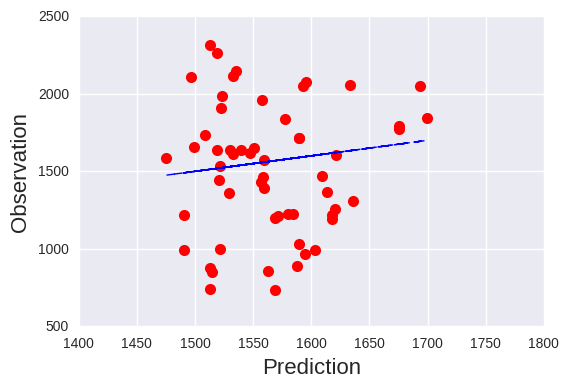

In [652]:
y_fit = lm_ce.predict(df_ce)   # Calculate the predicted value
plt.figure(figsize = (6,4))
plt.plot(y_fit,df_ce.ComplaintCounts,'or', markersize = 8) # Plot the observed value, linestyle = 'or', red dots
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                 # Plot the predicted value, blue dashed line

# Plot setting
plt.xlim(1400,1800)
plt.ylim(500,2500)
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)

### The plot above also shows that the relationship between number of complaints and the demographic factor(education level of population over age 25) is not obvious.

## Analysis 2. Complaint Counts ~ network infra  
#### Refined Question: 
#### Does network and mobile accessibility of the community district households affect the number of complaints?
#### Null Hypothesis: network and mobile accessibility does not affect the number of complaints
H0: The coefficients of factors representing mobile, high internet and low internet accessibility is not significant:<br\>
w1 = w2 = w3 = .. = 0 

H1 : At least one of the coefficients of the factors is significant: <br\>
w1, w2... or wn is not 0

In [637]:
df_merge.head(2)

,Community Board,ComplaintCounts,cd_id,FIPS,Total Population,Population Density (per sq. mile),Population 25 Years and over: Less Than High School,Population 25 Years and over: High School Graduate (includes equivalency),Population 25 Years and over: Some college,Population 25 Years and over: Bachelor's degree,Population 25 Years and over: Master's degree,Population 25 Years and over: Professional school degree,Population 25 Years and over: Doctorate degree,Qualifying Name,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn
49,12 MANHATTAN,3732,MN12,3603801,224365,75217.43287,46865,29587,32989,27972,14412,2695,2470,NYC-Manhattan Community District 12--Washingto...,26592,4124,108153,59383
20,05 BROOKLYN,2548,BK05,3604008,155863,26394.76469,22685,41138,20340,10426,4230,105,206,NYC-Brooklyn Community District 5--East New Yo...,9572,3968,72642,39346


In [660]:
#########################################
## 1. Using numbers from df_merge directly

lm_ci0 = smf.ols(formula='ComplaintCounts ~ hh_mobile + hh_speed_internet + hh_low_internet_conn', data=df_merge).fit()
print(lm_ci0.summary())

                            OLS Regression Results                            
Dep. Variable:        ComplaintCounts   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     6.795
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           0.000560
Time:                        17:05:02   Log-Likelihood:                -442.67
No. Observations:                  59   AIC:                             893.3
Df Residuals:                      55   BIC:                             901.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              325.9473 

### F-statistic: 6.795 and Prob (F-statistic):  0.000560
### the P-value for the coefficients of hh_mobile, hh_speed_internet and hh_low_internet_conn is less than 0.05;
### However, the R squared and adjusted R squared values are small.
### According to the model, these indicate that the examined group of factors--household's mobile and internet network connectvity of the community district-- might have statistically significant influence on the number of complaints. However, a more conconcrete conclusion can be made when a larger R-squared value could be received.
### There might also be non-linear relationship which needs further analysis to prove.
### The result might also be not accurate due to inaccurate data I used or processed. Therefore further investigation is necessary to ensure a better selection of data.

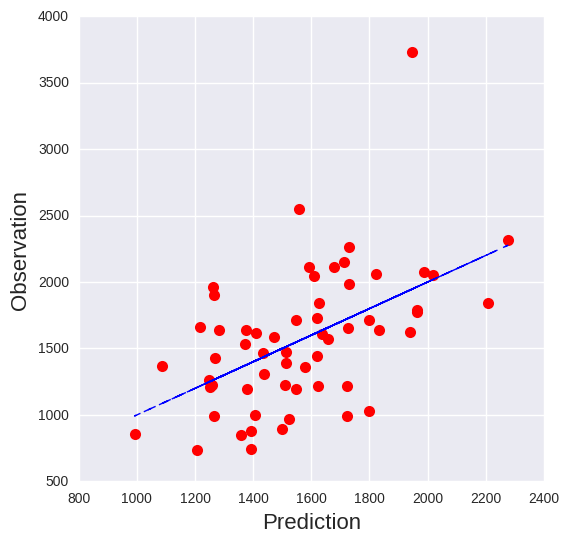

In [662]:
y_fit = lm_ci0.predict(df_merge)   # Calculate the predicted value
plt.figure(figsize = (6,6))
plt.plot(y_fit,df_merge.ComplaintCounts,'or', markersize = 8) # Plot the observed value, linestyle = 'or', red dots
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                 # Plot the predicted value, blue dashed line

# Plot setting
#plt.xlim(1000,2000)
#plt.ylim(500,2500)
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)

###  The plot shows a possible trend of the actual observation. The model needs to be adjusted to better fit the data.

In [680]:
#########################################
## 2. Using normalized numbers of the factors (normalized over total population of the community district)

In [638]:
# Create a new data frame to normalize the owning of mobile and high speed internet (also the low internet connection)
# Using Total Population to get the owning per capita
df_ci = pd.concat([df_merge.ix[:,('cd_id','ComplaintCounts')],      
        100*df_merge.iloc[:,-4:].div(df_merge['Total Population'], axis = 0)],  # Compute the percentage, column-wise
        axis = 1)

In [639]:
df_ci.head()

,cd_id,ComplaintCounts,hh_mobile,hh_no_mobile,hh_speed_internet,hh_low_internet_conn
49,MN12,3732,11.852116,1.838076,48.204043,26.467141
20,BK05,2548,6.141291,2.545826,46.606315,25.243964
50,QN12,2318,6.072063,8.358499,39.978566,22.270340
1,BK01,2261,13.870198,3.038529,58.669278,32.261672
53,BK14,2150,9.152128,1.582532,48.237911,26.298258


In [640]:
# run regression model
lm_ci = smf.ols(formula = 'ComplaintCounts ~ hh_mobile + hh_speed_internet + hh_low_internet_conn', data = df_ci).fit() 
print(lm_ci.summary())

                            OLS Regression Results                            
Dep. Variable:        ComplaintCounts   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.4446
Date:                Sun, 06 Nov 2016   Prob (F-statistic):              0.722
Time:                        16:24:15   Log-Likelihood:                -451.27
No. Observations:                  59   AIC:                             910.5
Df Residuals:                      55   BIC:                             918.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             1582.1515 

### F-statistic: 0.4446, Prob (F-statistic): 0.722 ;
### the P-value for each feature is not as small as 0.05;
### and both R squared and adjusted R squared values are small,
### According to the model, these indicate that the examined group of factors--mobile and internet accessibility of the community district-- have no statistically significant influence on the number of complaints.
### However, there might be non-linear relationship which needs further analysis to prove.
### The result might also be not accurate due to inaccurate data I used or processed. Therefore further investigation is necessary to ensure a better selection of data.

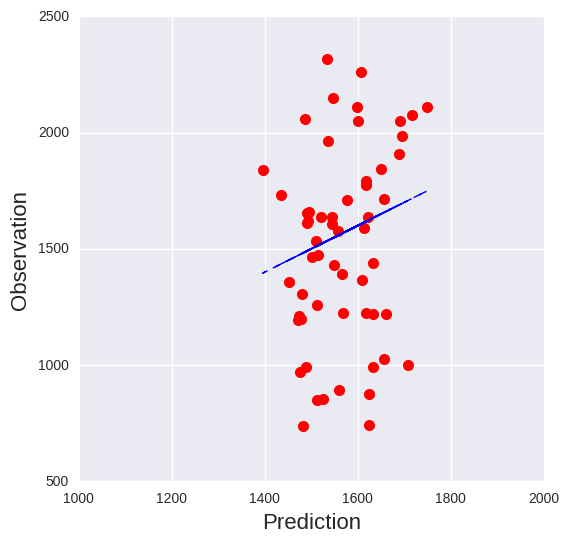

In [650]:
y_fit = lm_ci.predict(df_ci)   # Calculate the predicted value
plt.figure(figsize = (6,6))
plt.plot(y_fit,df_ci.ComplaintCounts,'or', markersize = 8) # Plot the observed value, linestyle = 'or', red dots
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                 # Plot the predicted value, blue dashed line

# Plot setting
plt.xlim(1000,2000)
plt.ylim(500,2500)
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)

### The plot above also shows that the relationship between number of complaints and the factor--mobile and internet accessibility per capita of a community district--is not obvious.